In [9]:
# Paso 1: Cargar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

# Paso 2: Cargar nuevo dataset
df = pd.read_csv("Credit Score Classification Dataset.csv")  # asegúrate de subirlo a Colab

# Paso 3: Preprocesamiento
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Variables predictoras y objetivo
X = df.drop("Credit Score", axis=1)
y = df["Credit Score"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Paso 4: Entrenar modelo base (Random Forest)
model = RandomForestClassifier(random_state=42)

start_time = time.time()
model.fit(X_train, y_train)
inference_time = time.time() - start_time

# Paso 5: Evaluación del modelo
y_pred = model.predict(X_test)

print("=== Random Forest - Evaluación Inicial ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Tiempo de inferencia (entrenamiento + predicción): {inference_time:.2f} segundos")


=== Random Forest - Evaluación Inicial ===
Accuracy: 0.9697
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.96      1.00      0.98        23
           2       1.00      1.00      1.00         5

    accuracy                           0.97        33
   macro avg       0.99      0.93      0.96        33
weighted avg       0.97      0.97      0.97        33

Tiempo de inferencia (entrenamiento + predicción): 0.15 segundos


In [10]:
# Paso 3.1: Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

# Aplicamos SelectKBest para seleccionar las 8 mejores características
selector = SelectKBest(score_func=chi2, k=8)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Guardar los nombres de las columnas seleccionadas
selected_features = X_train.columns[selector.get_support()]
print("Características seleccionadas:", list(selected_features))

# Entrenamos el modelo con características seleccionadas
model_selected = RandomForestClassifier(random_state=42)

start_time = time.time()
model_selected.fit(X_train_selected, y_train)
inference_time_selected = time.time() - start_time

# Evaluación
y_pred_selected = model_selected.predict(X_test_selected)

print("\n=== Random Forest con Feature Selection ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_selected):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_selected))
print(f"Tiempo de inferencia (modelo optimizado): {inference_time_selected:.2f} segundos")


Características seleccionadas: ['Age', 'Gender', 'Income', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']

=== Random Forest con Feature Selection ===
Accuracy: 0.9697
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.96      1.00      0.98        23
           2       1.00      1.00      1.00         5

    accuracy                           0.97        33
   macro avg       0.99      0.93      0.96        33
weighted avg       0.97      0.97      0.97        33

Tiempo de inferencia (modelo optimizado): 0.14 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=8 is greater than n_features=7. All the features will be returned.
  warnings.warn(


In [11]:
# Paso 3.2: Model Pruning
model_pruned = RandomForestClassifier(
    n_estimators=50,        # menos árboles
    max_depth=5,            # limitar la profundidad
    min_samples_split=10,   # mínimo para dividir
    min_samples_leaf=5,     # hojas más grandes
    random_state=42
)

start_time = time.time()
model_pruned.fit(X_train_selected, y_train)  # usamos las features seleccionadas
inference_time_pruned = time.time() - start_time

# Evaluación del modelo podado
y_pred_pruned = model_pruned.predict(X_test_selected)

print("\n=== Random Forest Podado (Pruning) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pruned):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_pruned))
print(f"Tiempo de inferencia (modelo podado): {inference_time_pruned:.2f} segundos")



=== Random Forest Podado (Pruning) ===
Accuracy: 0.9091
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.95      0.91      0.93        23
           2       1.00      1.00      1.00         5

    accuracy                           0.91        33
   macro avg       0.87      0.90      0.89        33
weighted avg       0.92      0.91      0.91        33

Tiempo de inferencia (modelo podado): 0.08 segundos


In [12]:
# Paso 3.3: Simulación de Quantization usando un modelo más ligero
from sklearn.tree import DecisionTreeClassifier

model_lightweight = DecisionTreeClassifier(
    max_depth=4,           # limitamos profundidad
    min_samples_leaf=5,    # hojas más grandes
    random_state=42
)

start_time = time.time()
model_lightweight.fit(X_train_selected, y_train)
inference_time_lightweight = time.time() - start_time

# Evaluación del modelo liviano
y_pred_lightweight = model_lightweight.predict(X_test_selected)

print("\n=== Árbol de Decisión (Modelo Liviano / Quantized) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lightweight):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lightweight))
print(f"Tiempo de inferencia (modelo liviano): {inference_time_lightweight:.2f} segundos")



=== Árbol de Decisión (Modelo Liviano / Quantized) ===
Accuracy: 0.9091
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.95      0.91      0.93        23
           2       1.00      1.00      1.00         5

    accuracy                           0.91        33
   macro avg       0.87      0.90      0.89        33
weighted avg       0.92      0.91      0.91        33

Tiempo de inferencia (modelo liviano): 0.00 segundos


In [13]:
import numpy as np
import time

# Paso 4: Stress Testing (simulamos 5000 predicciones)
stress_inputs = np.tile(X_test_selected, (200, 1))  # 200 repeticiones = ~5000 inputs
stress_outputs = []

start_time = time.time()
for row in stress_inputs:
    stress_outputs.append(model_lightweight.predict([row])[0])
stress_duration = time.time() - start_time

print("=== Stress Testing (Modelo Liviano) ===")
print(f"Total de predicciones: {len(stress_outputs)}")
print(f"Tiempo total: {stress_duration:.2f} segundos")
print(f"Tiempo promedio por predicción: {stress_duration / len(stress_outputs):.4f} segundos")


=== Stress Testing (Modelo Liviano) ===
Total de predicciones: 6600
Tiempo total: 1.20 segundos
Tiempo promedio por predicción: 0.0002 segundos


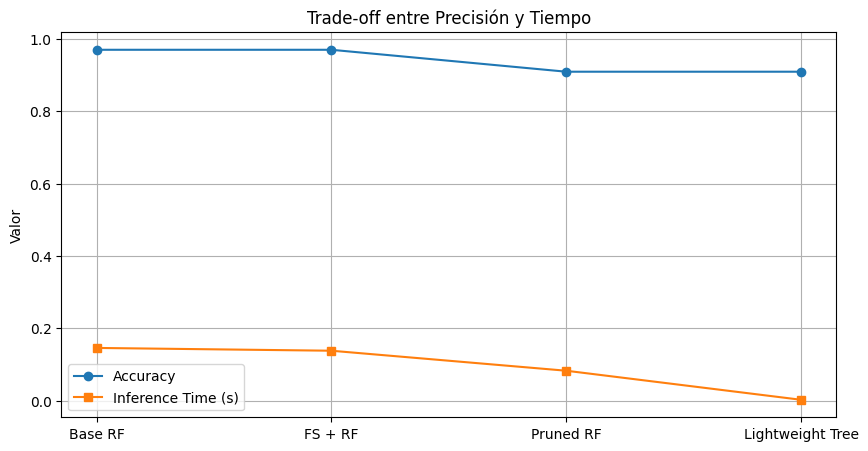

In [14]:
import matplotlib.pyplot as plt

# Supongamos que estas son las precisiones reales de tus modelos
model_names = ["Base RF", "FS + RF", "Pruned RF", "Lightweight Tree"]
accuracies = [
    accuracy_score(y_test, model.predict(X_test)),
    accuracy_score(y_test, model_selected.predict(X_test_selected)),
    accuracy_score(y_test, model_pruned.predict(X_test_selected)),
    accuracy_score(y_test, model_lightweight.predict(X_test_selected)),
]
inference_times = [
    inference_time,
    inference_time_selected,
    inference_time_pruned,
    inference_time_lightweight,
]

# Gráfico de comparación
plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracies, marker="o", label="Accuracy")
plt.plot(model_names, inference_times, marker="s", label="Inference Time (s)")
plt.title("Trade-off entre Precisión y Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()
